# 합성곱 신경망을 사용한 이미지 분류

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [2]:
#데이터 가져오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


> 첫 번째 합성곱 층

In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 두 번째 합성곱 층 + 완전 연결 층

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#kernel_size(3)으로 해도 됨

model.add(keras.layers.MaxPooling2D(2))

#완전 연결 층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

> 컴파일과 훈련

In [6]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.7402 - loss: 0.7244 - val_accuracy: 0.8758 - val_loss: 0.3355
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8686 - loss: 0.3654 - val_accuracy: 0.8973 - val_loss: 0.2804
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.8869 - loss: 0.3074 - val_accuracy: 0.9013 - val_loss: 0.2652
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8976 - loss: 0.2735 - val_accuracy: 0.9121 - val_loss: 0.2423
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9076 - loss: 0.2520 - val_accuracy: 0.9141 - val_loss: 0.2350
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.9147 - loss: 0.2282 - val_accuracy: 0.9177 - val_loss: 0.2350
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9208 - loss: 0.2094 - val_accuracy: 0.9147 - val_loss: 0.2510


> 평가와 예측

In [7]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9171 - loss: 0.2259


[0.23498238623142242, 0.9140833616256714]

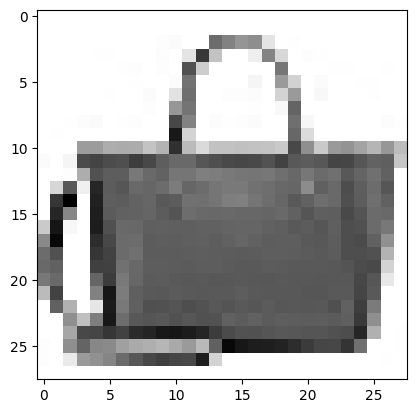

In [8]:
import matplotlib.pyplot as plt

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [9]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
[[1.1236859e-17 1.5176964e-24 3.1556142e-19 4.9576511e-17 1.5392977e-18
  8.0073763e-17 6.5355515e-18 1.2350365e-17 1.0000000e+00 2.6106941e-18]]


> 테스트 세트 점수

In [10]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9075 - loss: 0.2648


[0.2544611990451813, 0.9067000150680542]

# 합성곱 신경망의 시각화

In [11]:
#데이터 준비
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2024-11-16 11:10:26--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2024-11-16 11:10:26--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras.1’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.1s    

2024-11-16 11:10:27 (32.8 MB/s) - ‘best-cnn-model.keras.1’ saved [4038273/4038273]



In [12]:
model = keras.models.load_model('best-cnn-model.keras')

> 층의 가중치 분포

In [13]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [14]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


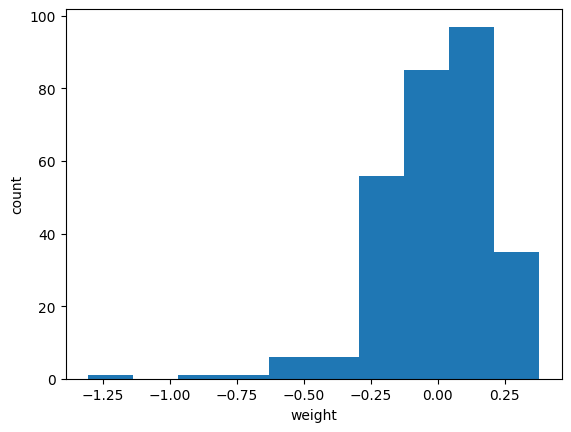

In [15]:
conv_weights = conv.weights[0].numpy()

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

> 층의 가중치 시각화

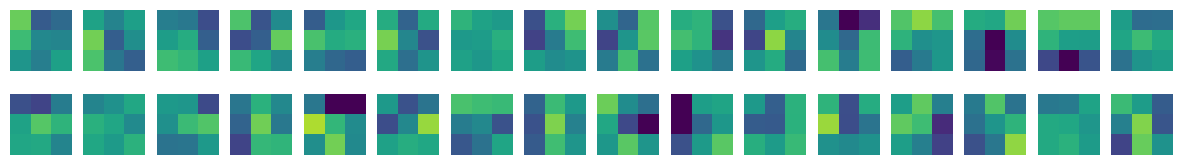

In [16]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')

plt.show()

> 함수형 API, 첫 번째 특성 맵 시각화

In [17]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
(1, 28, 28, 32)


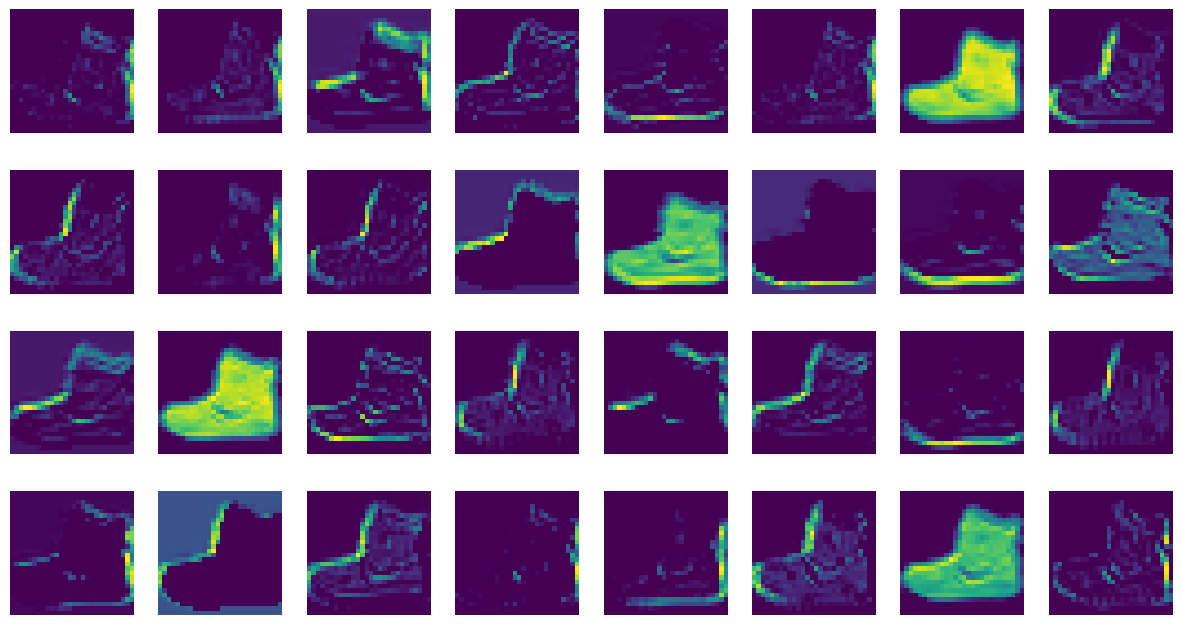

In [18]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [19]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
(1, 14, 14, 64)


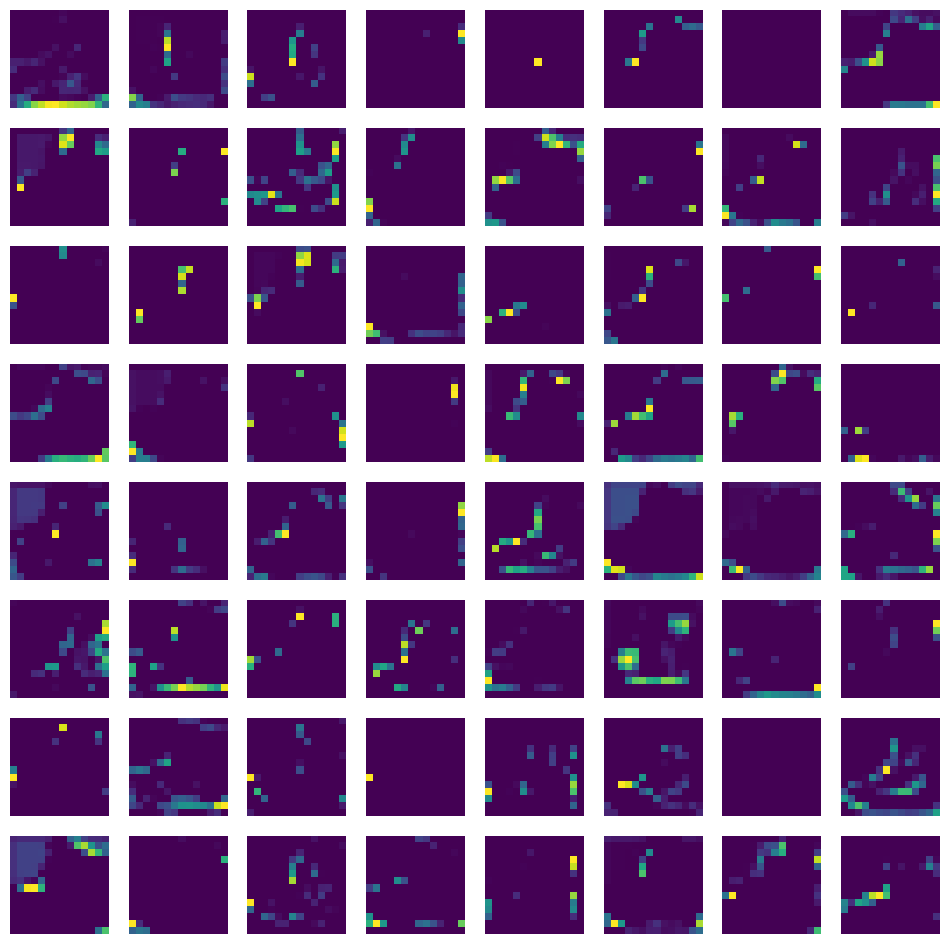

In [20]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()